In [392]:
import sympy as sym
from sympy.functions import exp
from sympy.abc import x

In [393]:
x

x

Resolver el problema de regresión:

$$\underset{\alpha, \mu}{\operatorname{min}} J(\alpha, \mu) = \frac{1}{2n}\sum_{i=1}^n (\alpha \Phi(x_i) - y_i)^2$$

Para el caso donde m=1 y $\Phi = \phi$.

Derivadas parciales de cada $\phi_j$:

$$\frac{\partial}{\partial \mu} \phi_j = - \phi \frac{(x - \mu_j)}{\sigma ^ 2}$$

$$\frac{\partial}{\partial \mu} J(\alpha, \mu)  =  2/n * J'(\alpha, \mu) \frac{\partial}{\partial \mu} \phi_j$$


El Jacobiano de $\Phi = \phi_j$:

- Con $\a$ constante:
$$\nabla_x\Phi = \frac{\partial}{\partial \mu} \phi_j$$

Gradiente:

$$\alpha_j = \alpha_j - k$$

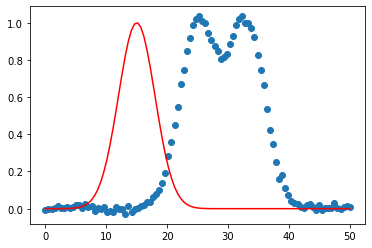

In [761]:
def build_approximately_normal_distribution(x, a: float = 1, mu: float = 0, sigma: float = 1, noise = 0.01):
    y: np.ndarray = normal_distribution(x, mean=mu, standard_deviation=sigma)
    noise = noise * np.random.normal(size=y.shape[0])
    y += noise
    return y



    

mu1 = 33
mu2 = 25
sig_cons = 3
x = np.linspace(0, 50, 100)
y1 = build_approximately_normal_distribution(
    x, mu=mu1, sigma=sig_cons)
y2 = build_approximately_normal_distribution(
    x, mu=mu2, sigma=sig_cons)
y3 = build_approximately_normal_distribution(
    x, mu=mu2, sigma=sig_cons)

y = y1 + y2 

mu_int1 = 15
mu_int2 = 25
y_init = build_approximately_normal_distribution(
    x, mu=mu_int1, sigma=sig_cons, noise=0)

plt.scatter(x, y)
plt.plot(x, y_init, c='red' )

La final>
$$\underset{\alpha, \mu}{\operatorname{min}} J(\alpha, \mu) =  \frac{1}{2n}\sum_{i=1}^n \left( \sum_{j=1}^m\alpha_j\phi_j(x_i) - y_i \right)^2$$

In [808]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math

In [809]:
def phi_j(x, mu_j):
    sig = sig_cons # Sigma constante
    phi = np.exp( - (x - mu_j)**2 / (2 * sig**2))
    return phi

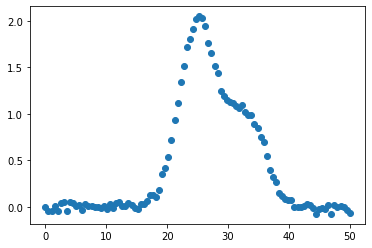

In [810]:
def build_app_norm(x, a, mu, noise=0.01):
    y = np.zeros_like(x)
    for j in range(len(mu)):
        y += a[j] * phi_j(x, mu[j])
    y += noise * np.random.normal(size=y.shape[0])
    return y

y = build_app_norm(x, [1, 2], [33, 25], noise=0.03)
plt.scatter(x, y)

In [924]:
def phi_j(x, mu_j):
    sig = sig_cons # Sigma constante
    phi = np.exp( - (x - mu_j)**2 / (2 * sig**2))
    return phi

def partial_phi_mu(x, mu_j):
    sig = sig_cons # Sigma constante
    phi = phi_j(x, mu_j)
    part_phi_mu = - ((x - mu_j) / sig**2)  * phi
    return part_phi_mu
    

def PHI(x, mus):
#     PHI = np.zeros_like(x)
    PHI = []
    for mu_j in mus:
        PHI.append(phi_j(x, mu_j))
    return np.array(PHI)

def J(x, y, mu):
    y_hat = PHI(x, mu)
    residual = y - y_hat.sum()
    cost = (residual).dot(residual) 
    return cost

def grad_gauss(x, y, thetas, alphas):
    nablaJ = []
#     alpha = np.ones_like(theta)
    y_hat = alphas.dot( PHI(x, thetas) )
    dJ_df = y - y_hat # aqui estaria alphas
    
    for mu_j in thetas:
        dp_dmu_j = partial_phi_mu(x, mu_j)
        dJ_dmu_j = dJ_df.dot(dp_dmu_j)        
        nablaJ.append(dJ_dmu_j)
        

    return np.array(nablaJ)


def GD(grad, thetas, alphas,
       x, y, lr,
       n_iter = 250):
    
    thetas = np.array(thetas)
    alphas = np.array(alphas)

    for t in range(n_iter):
        # Alphas
        PHI_ = PHI(x, thetas).T
        alphas = np.linalg.inv(PHI_.T.dot(PHI_)).dot(PHI_.T).dot(y)
        
        # Gradiente para mus
        nablaJ = grad(x, y, thetas, alphas)
        thetas = thetas - lr*nablaJ
        
    return thetas, alphas

#### Hay que poner una base para inicializar mu0

In [925]:
y.reshape([1, -1]).shape

(1, 100)

In [926]:
mu_int1, mu_int2 = 32, 19
mu_hat, a_hat = GD(grad = grad_gauss, 
            thetas = [mu_int1, mu_int2],
            alphas = [1, 1],
            x=x, y=y, 
            lr=0.1, n_iter=1000)

mu_hat, a_hat

(array([32.9303085 , 24.98389872]), array([1.00118711, 2.00401471]))

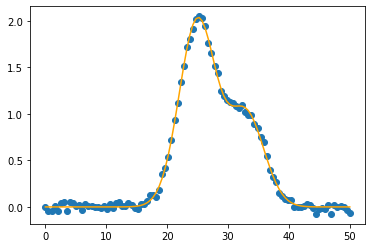

In [927]:

# predict_a = PHI(x, mu_hat)
predict_a = np.array(a_hat).dot(PHI(x, mu_hat))
c1 = phi_j(x, 33)
c2 = phi_j(x, 25)
# plt.plot(x, c1 + c2)
plt.scatter(x, y)
plt.plot(x, predict_a, c='orange')

In [906]:
PHI(x, mu_hat).shape

(2, 100)